# NLE Assessed Coursework 1

For this assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about these coursework questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.

In [187]:
candidateno=198934 #this MUST be updated to your candidate number so that you get a unique data sample


In [188]:
#preliminary imports
import sys
sys.path.append(r'\\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources')
sys.path.append(r'/Users/farahgee/Desktop/resources')
sys.path.append(r'/Users/farahgee/Desktop/Week4Labs')
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.tokenize import word_tokenize
from nltk.classify import accuracy 
from week3 import *
import nltk
from sussex_nltk.corpus_readers import AmazonReviewCorpusReader
import random
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier 

from itertools import zip_longest
import matplotlib.pyplot as plt


import numpy as np



# Question 1: Naive Bayes Classification (25 marks)

In this question, you will be considering how a Naive Bayes classifier can be applied to the task of deciding whether sentences are relevant or not relevant to the kitchen domain.

The code below will generate for you two small unique sets of sentences, which you should refer to in your answer to this question.   This question will be marked on the quality of your explanations rather than the quality of your code.

In [300]:
#Do NOT change the code in this cell.

topics=["book","kitchen","dvd","electronics"]
samplesize=3
stop=stopwords.words('english')

trainingsentences=[]
testsentences=[]
cr = AmazonReviewCorpusReader()

for topic in topics:
    random.seed(candidateno)
    if topic == "kitchen":
        key="kitchen"
    else:
        key="not-kitchen"
    topicsentences=[]
    while len(topicsentences)<2:
        topicsentences=[({token.lower():True for token in doc if token not in stop and token.isalpha()},key) for doc in cr.category(topic).sample_sents(samplesize=samplesize) if len(doc)>0]
    testsentences.append(topicsentences[0])
    trainingsentences+=topicsentences[1:]

random.shuffle(trainingsentences)
random.shuffle(testsentences)
print("Number of training sentences is {}.  Number of testing sentences is {}".format(len(trainingsentences),len(testsentences)))
trainingsentences

Number of training sentences is 8.  Number of testing sentences is 4


[({'we': True, 'use': True, 'least': True, 'day': True, 'kitchen': True},
  'kitchen'),
 ({'the': True,
   'wall': True,
   'mount': True,
   'bracket': True,
   'causes': True,
   'base': True,
   'stick': True,
   'straight': True,
   'previous': True,
   'reviewer': True,
   'mentioned': True,
   'usually': True,
   'nose': True,
   'given': True,
   'location': True,
   'mounts': True},
  'not-kitchen'),
 ({'exellent': True,
   'story': True,
   'actors': True,
   'great': True,
   'buy': True,
   'watch': True,
   'show': True,
   'family': True},
  'not-kitchen'),
 ({'while': True,
   'dvd': True,
   'piles': True,
   'extras': True,
   'making': True,
   'retrospective': True,
   'entertaining': True,
   'informative': True,
   'film': True,
   'attraction': True},
  'not-kitchen'),
 ({'the': True,
   'gps': True,
   'good': True,
   'great': True,
   'i': True,
   'must': True,
   'go': True,
   'outdoors': True,
   'pick': True,
   'signal': True,
   'even': True,
   'takes': 

a) With reference to the sentences generated above, **explain** how a Naive Bayes classifer would be trained to carry out the task of deciding whether sentences are relevant to the kitchen domain.  You do **not** need to build or train a classifier.  However, you should explain the relevant probabilities with reference to examples taken from your samples of sentences.  \[10 marks\]

#1) a naive bayes classifier uses  supervised training which splits the document into training and testing sets.
#2) we generate a wordlist from the document of labelled words,  when we generate a wordlist it is used to create the model of relevant wor  lists, which is then used to decide whether a word is relevant or not
#3) the training set is used on the list of labelled words, hence 'supervised learning', based on the percen

#1) the probability of the sentence being in the kitchen (either in kitchen or not kitchen)


A classifier consults a model which has been given to it or learnt in someway, and then decides which of the following classes is the most likely class. 
This model comes from learnt examples, in this case the Naive Bayes, which can take the examples and turn that into a set of weights or parameters from 
which it can then make a decision for unseen docuements. the classifier encoder then takes the labelled data and will produce a model (which is a list or tuple of parameters), 
it will take that model and some unlabelled data, and give it to the classifier decoder which will then be able to make a decision for each document in the unlabelled data to 
decide what the label should be. so at 'decode time', we are just taking in a set of documents, with no labels attached to the feature representation, and we produce the data 
to the same format we see the labelled data in. 


The first step a naive bayes classifier goes through in order to classify a document, d, is to to determine which of these probabilities is greatest:
        
        p(kitchen|d)  versus P(not-kitchen|d)
d could, for example, be the string "i bought coffee maker match kitchenaid blender gridner kitchen" 
P(kicthen|"i bought coffee maker match kitchenaid blender gridner kitchen") 
versus P(not-kitchen|"i bought coffee maker match kitchenaid blender gridner kitchen")
the idea is that if the value on of p(kitchen|d) is higher then the document is in the 
category domain kitchen, otherwise if the the probability p(not-kitchen|d) is higher 
then the document is in the catergory not-kitchen


P(F|G) means the probability of F given G. 
So, P(kitchen|d) means the probability, 
given a document d, where d is of class Kitchen.

we are going to use something called Bayes' rule which states that:
    
        P(F|G) = P(G|F).P(F)/P(G)
        
Applying Bayes rule to our problem leads to the following comparison: 

P(kitchen|d) = P(d|kitchen).P(kitchen)/p(d)  versus  p(d|not-kitchen).p(not-kitchen)/p(d)

since both sides are being divided by the same thing, we only need to make the following comparison:
    
        p(d|kitchen).p(kitchen)  versus p(d|not-kitchen).p(not-kitchen)
        
the following is an explanation of what each of these probabilities mean

1. P(d|kitchen): this is the probability of a document in the kitchen domain being the document d
2. P(d|not-kitchen): this is the probability of a document in the not-kitchen domain being the document d
3. P(kitchen): this is the probability of a random selected document being of category kitchen 
4. p(not-kitchen): this is the probability of a randomly selected document of catrgory not-kitchen 
            
to obtain these probabilities, we go into the classifier encode phase, which learns the model that will be used. 
we must acknowledge the class priors, P(kitchen) and P(not-kitchen). 
the following is the calculation for the class priors: 
since we have 3 training documents which are under the kitchen domain, and 5 traning documents which are under the 
not-kitchen domain.

        P(kitchen)= 3/8 = 0.375   p(not-kitchen) = 5/8 = 0.625
P(kicthen|"i bought coffee maker match kitchenaid blender gridner kitchen")

we must obtain the estimated values for these conditional probabilities from our training data

p("i"|kitchen ) = 0/10
p("bought"|kitchen|) = 0/10
p("coffee"|kitchen) = 0/10
p("maker"|kitchen)= 0/10
p("match"|kithen) = 0/10
p("kitchenaid"|kitchen) = 0/10
p("blender"|kitchen) = 0/10
p("grinder"|kitchen) =0/10
p("kitchen"|kitchen) = 1/10

Since most of the tokens that are in our test sentence do not appear in our training documents, 
one or more zeros in the probabilities leads to  data sparsness once the probabilities are mulitiplied 
by each other. 
to avoid this, we apply smoothing, which adds-one, to each of the values applied, that way if a feature has not been
seen, we give it a count of 1. if it has been seen once, we will give it a count of 2, and so on. which means that low 
probability events get low probabilities do not get 0's. 
#applying SMOOTHING for kitchen 
p("i"|kitchen ) = 1/10
p("bought"|kitchen|) = 1/10
p("coffee"|kitchen) = 1/10
p("maker"|kitchen)= 1/10
p("match"|kithen) = 1/10
p("kitchenaid"|kitchen) = 1/10
p("blender"|kitchen) = 1/10
p("grinder"|kitchen) =1/10
p("kitchen"|kitchen) = 2/10

#calculate the probability by multiplying all individual probabilities
p("i bought coffee maker match kitchenaid blender gridner kitchen"|kitchen) = 
p("i"|kitchen) x p("bought"|kitchen|) x p("coffee"|kitchen) x p("maker"|kitchen) x p("match"|kithen) x p("kitchenaid"|kitchen) x p("blender"|kitchen) x p("grinder"|kitchen) x p("kitchen"|kitchen)
p("i bought coffee maker match kitchenaid blender gridner kitchen"|kitchen) = 0.16 = 16%

#now calculate the probability of a document, d, given not kitchen 
p(not-kitchen|"i bought coffee maker match kitchenaid blender gridner kitchen")

p("i"|not-kitchen ) = 0/78 
p("bought"|not-kitchen) = 0/78
p("coffee"|not-kitchen) = 0/78
p("maker"|not-kitchen)= 0/78
p("match"|not-kithen) = 0/78
p("kitchenaid"|not-kitchen) = 0/78
p("blender"|not-kitchen) = 0/78
p("grinder"|not-kitchen) = 0/78
p("kitchen"|not-kitchen) = 0/78


smoothing will be applied to the not-kitchen domain as well, due to an occurence of a 0 in one or more of the features' probabilities.
#applying SMOOTHING for not-kitchen 
p("i"|not-kitchen ) = 1/78 
p("bought"|not-kitchen) = 1/78
p("coffee"|not-kitchen) = 1/78
p("maker"|not-kitchen)= 1/78
p("match"|not-kithen) = 1/78
p("kitchenaid"|not-kitchen) = 1/78
p("blender"|not-kitchen) = 1/78
p("grinder"|not-kitchen) = 1/78
p("kitchen"|not-kitchen) = 1/78

p("i bought coffee maker match kitchenaid blender gridner kitchen"|not-kitchen) = p("i"|not-kitchen) x p("bought"|not-kitchen|) x p("coffee"|not-kitchen) x p("maker"|not-kitchen) x p("match"|not-kithen) x p("kitchenaid"|not-kitchen) x p("blender"|not-kitchen) x p("grinder"|not-kitchen) x p("kitchen"|not-kitchen)
p("i bought coffee maker match kitchenaid blender gridner kitchen"|not-kitchen) = 0.115 = 11.5%

As we can see p(kitchen|"i bought coffee maker match kitchenaid blender gridner kitchen")> p(not-kithcen|"i bought coffee maker match kitchenaid blender gridner kitchen")
meaning the bag-of-words belongs to class kitchen.


b) With reference to the sentences generated above, **explain** how a trained Naive Bayes classifier would assign a class to a sentence. \[5 marks\]

the naive bayes classifier 
#explain what the classifier does.

#calculate the probabilities above 
When the  feature extractor turms a document into a set or vector of features
the classfier then a consults a model of what features to expect in different classes and 
decides the most likely accordingly. this model is learnt from the naive bayes method.

the classifier comes up with a probability of whether the document is in class Kitchen or in class not-kitchen,
using Bayes Law, which was shown above.

P(F|G) means the probability of F given G. 
So, P(kitchen|d) means the probability, 
given a document d, where d is of class Kitchen.

P(kitchen)= 3/8 = 0.375   p(not-kitchen) = 5/8 = 0.625
P(kicthen|"i bought coffee maker match kitchenaid blender gridner kitchen")

the conditional probability is calculated 
p("i"|kitchen ) = 0/10
p("bought"|kitchen|) = 0/10
p("coffee"|kitchen) = 0/10
p("maker"|kitchen)= 0/10
p("match"|kithen) = 0/10
p("kitchenaid"|kitchen) = 0/10
p("blender"|kitchen) = 0/10
p("grinder"|kitchen) =0/10
p("kitchen"|kitchen) = 1/10

after smoothing is applied:

p("i"|kitchen ) = 1/10
p("bought"|kitchen|) = 1/10
p("coffee"|kitchen) = 1/10
p("maker"|kitchen)= 1/10
p("match"|kithen) = 1/10
p("kitchenaid"|kitchen) = 1/10
p("blender"|kitchen) = 1/10
p("grinder"|kitchen) =1/10
p("kitchen"|kitchen) = 2/10

the classifier uses these probabilities to determine whether a document is of a specific class, in this case Kitchen.
this is done by calculating the probability of each individual word occuring in the predicted class, using conditional
probabilitiy. The example shown above for the bag of words "i bought coffee maker match kitchenaid blender gridner kitchen",
first the class priori is calculated which is the probability of kitchen, 0.375. 

the conditional probabilities are calculated by finding the inidividual probability of each word in that sentence to be 
of class kitchen. Since most of the tokens that are in our test sentence do not appear in our training documents, 
one or more zeros in the probabilities may appear and lead to  data sparsness once the probabilities are mulitiplied 
by each other. 

therefore 'smoothing' is applied to these probabilities. smoothing is adding one to the counter to each of the values applied, that way if a feature has not been
seen, we give it a count of 1. if it has been seen once, we will give it a count of 2, and so on. which means that low 
probability events get low probabilities do not get 0's. 

finally, all the conditional probabilities are multiplied by each other and multiplied by the prior probability.

p("i bought coffee maker match kitchenaid blender gridner kitchen"|kitchen) = 
p("i"|kitchen) x p("bought"|kitchen|) x p("coffee"|kitchen) x p("maker"|kitchen) x p("match"|kithen) x p("kitchenaid"|kitchen) x p("blender"|kitchen) x p("grinder"|kitchen) x p("kitchen"|kitchen)
p("i bought coffee maker match kitchenaid blender gridner kitchen"|kitchen) = 0.16 = 16%

This percentage is higher than that of the (p|not-kitchen), which was 0.115%, meaning that the classifier identified the bag of words as the domain kitchen.




c) The labels assigned to the sentences contained in the variable `testsentences` above are \['kitchen','not-kitchen','not-kitchen','not-kitchen'\].  Using this example to illustrate your answer, **explain** how each of the performance metrics of *accuracy*, *precision*, *recall* and *F1-score* are calculated.  Which of these metrics would you use to choose between classification models in this example?  **Justify your answer**. \[10 marks\]


#q1) explain how each of  the performance metrics
#of a) accuracy, b) precision, c) recall and d) F1-score are calculated.
#
#q2)Which of these metrics would you use to choose 
# between classification models in this example?

q1a)
    In order to evaluate a classifier, we an look at the acccuracy and error rate.
accuracy is the proportion of items in the test set that are classified correctly, it checks 
for every single document in our set, if the prediction matched the label.
This is demosntrated on a 'confusion matrix', where the matrix is made up of predicted classes x 
true classes; the predictions we got right go on the leading diagonal. 
    The equation to calculate the accuracy is by: adding the true positives, or TP,(values we 
predicted as positive, and were actually positive) to the TN, or true negative(the classes we predicted as negative, 
and were actually negative) as numerators, and divide that by the value of N, which is the total number of data items.
    In the case of the kitchen domain, this can be done easily in a table representation. The actual test sentences obtained 
['kitchen','not-kitchen','not-kitchen','not-kitchen'], and the actual sentences are 
['kitchen','not-kitchen','not-kitchen','not-kitchen'].  This means our confusion matrix will show TP for [kitchen] and [kitchen], and 
TN for the preceeding three [not-kitchen]'s. 
    so if we were to put this in thr accuracy equation, TP + TN/N, we would get: 
1+3/4 = 4/4 = 1 = 100% accuracy 
this shows that for every sentence in our set, the classifier was 100% accurate in predicting the class in which it belonged to.

    1b)
#precision 
In order to calculate the precision, we must know out of all the things that were predicted as postitive, how many are actually positive.
true positive/true positive + false positive 
1/1+0 = 1/1 = 1 = 100% precision 
    1c)
#recall
recall is the proportion of actually positive documents that are predicted correctly, 
so we consider  all the things we could have predicted as positive, how many did we actually get. 
recall = TP/TP + FN, so if we apply this equation to our assigned sentences above,
1/1+0 = 1/1 = 1 = 100% recall

these values can be obtained from adding an additional total column and row to our existing confusion 
matrix. 

    1d) 
#f1score
we want out classifiers to have high recision and high recall, so we can combine then into one equation called th f1 score.
f1 = 2 x P x R /P + R,   (where p is precision, and r is recall)
This formula uses harmonic mean, instead of arithmetic, is is a measure of central tendancy,
however is is biased or weighted towards the lower value/number
so in the case of kitchen domain,

2 x 1 x 1/1 + 1 = 2/2 = 1 
f1 score = 1 = 100%

this shows to have a 'good' classifier, you need both the recall and the precision to be higher values,
since a low value in either will bring down the overall f1 score.

#pick a metric to use for naive bayes classifier and discuss why
q2)
    The most suitable metric to be chosen in this situatio, would be the recall.
By elimination, using precision as a measurement isnt necesarrily helpful. 
very high precision could mean that the training class is too fitting or specific 
    
#tradeoff 
However, there are occasions we would want to trade of either of them. 


## Question 2: Training Data for Sentiment Analysis (25 marks)
The objective of this question is to investigate the extent to which performance of a Naive Bayes classifier is affected by the quantity and quality of the training data.  Does more training data mean better performance?  Is performance degraded if we train on one domain and test on another domain?  For example, suppose we train a sentiment classifier on book reviews and then test that classifier on a collection of dvd reviews. Does it perform as well as it would when trained on dvd reviews?

The code below is included to enable you to get pre-formatted training and test data for a given category (evenly split between positive and negative reviews).  In this question, there are marks available for the quality of your programming, your experimental design and your interpretation of results.


In [127]:
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def feature_extract(review):
    """
    Generate a feature representation for a review
    :param review: AmazonReview object
    :return: dictionary of Boolean features
    """
    return {word:True for word in review.words()}

def get_training_test_data(category,ratio=0.7,seed=candidateno):
    """
    Get training and test data for a given category and ratio, pre-formatted for use with NB classifier
    :param category: category of review corpus, one of ["kitchen, "dvd, "book", "electronics"]
    :param ratio: proportion of data to use as training data
    :return: pair of lists 
    """
    reader=AmazonReviewCorpusReader().category(category)
    random.seed(candidateno)
    pos_train, pos_test = split_data(reader.positive().documents(),ratio=ratio)
    neg_train, neg_test = split_data(reader.negative().documents(),ratio=ratio)
    train_data=[(feature_extract(review),'P')for review in pos_train]+[(feature_extract(review),'N') for review in neg_train]
    test_data=[(feature_extract(review),'P')for review in pos_test]+[(feature_extract(review),'N') for review in neg_test]
    return train_data,test_data


a) By varying the amount of training data used, **investigate** the impact of the amount of training data used on the accuracy of a Naive Bayes classifier for each of the four domains: *dvd*, *book*, *kitchen* and *electronics*.  You should use the NaiveBayesClassifier from the `nltk.classify` library.  You should also use a table and an appropriate graph(s) to display your results.  Make sure you **discuss** your results and conclusions. \[8 marks\]

In [128]:
def classifier_evaluate(category, r):
    training, testing = get_training_test_data(category, r)
    classifier = NaiveBayesClassifier.train(training)
    return accuracy(classifier, testing)


In [129]:
r02 = [classifier_evaluate("book",0.2), classifier_evaluate("kitchen", 0.2),  classifier_evaluate("dvd", 0.2), classifier_evaluate("electronics", 0.2)]
r04 = [classifier_evaluate("book",0.4), classifier_evaluate("kitchen", 0.4),  classifier_evaluate("dvd", 0.4), classifier_evaluate("electronics", 0.4)]
r05 = [classifier_evaluate("book",0.5), classifier_evaluate("kitchen", 0.5),  classifier_evaluate("dvd", 0.5), classifier_evaluate("electronics", 0.5)]
r08 = [classifier_evaluate("book",0.8), classifier_evaluate("kitchen", 0.8),  classifier_evaluate("dvd", 0.8), classifier_evaluate("electronics", 0.8)]

pd.DataFrame(list(zip_longest(r02,r04,r05,r08)),columns=["R0.2", "R0.4","R0.5", "R0.8"], index= ["book", "kitchen", "dvd", "electronics"])



,R0.2,R0.4,R0.5,R0.8
book,0.683750,0.729167,0.734,0.785
kitchen,0.780625,0.800833,0.793,0.830
dvd,0.645000,0.678333,0.723,0.775
electronics,0.658750,0.752500,0.769,0.770


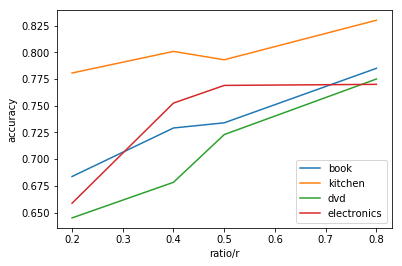

In [130]:
#x is always constant 
#topics=["book","kitchen","dvd","electronics"]
x = [0.2, 0.4, 0.5, 0.8]
y1 = [classifier_evaluate("book", 0.2),classifier_evaluate("book", 0.4),classifier_evaluate("book", 0.5), classifier_evaluate("book", 0.8)]
plt.plot(x, y1, label = "book")

y2 = [classifier_evaluate("kitchen", 0.2),classifier_evaluate("kitchen", 0.4),classifier_evaluate("kitchen", 0.5), classifier_evaluate("kitchen", 0.8)]
plt.plot (x, y2, label = "kitchen")

y3 = [classifier_evaluate("dvd", 0.2),classifier_evaluate("dvd", 0.4),classifier_evaluate("dvd", 0.5), classifier_evaluate("dvd", 0.8)]
plt.plot (x , y3, label = "dvd")

y4 = [classifier_evaluate("electronics", 0.2),classifier_evaluate("electronics", 0.4),classifier_evaluate("electronics", 0.5), classifier_evaluate("electronics", 0.8)]
plt.plot (x, y4, label = "electronics")

plt.xlabel('ratio/r')
plt.ylabel('accuracy')

#shows the key table
plt.legend()
#shows the graph
plt.show()


The table and graph shown above suggest that the lower the training data the lower the accuracy is, 
and conversely, the higher the training data, the higher the accuracy is.

for instance if we look at the kicthen domain as our example, we can see that when the ratio of training to testing
is 0.2, the accuracy is 0.6, and when the ratio is 0.4, the accuracy increases to 0.729, and increases again for the ratio of 0.5 to 0.79.
finally the accuracy is the highest at the highest training ratio, where 80% of the documents are being used for training and 20% for testing.

this pattern is present for the remaining domains. this suggests that the quanitity of data used for training affects the classifier, and in turn 
trains it better to become more accurate in its predictions.

b) For each possible combination of source and target domain, **evaluate** the accuracy of a Naive Bayes classifier trained on the source domain and tested on the target domain.  There are four domains so there are 16 possible combinations you should consider.  You should use a table and an appropriate graph(s) to display your results.  Make sure you **discuss** your results and conclusions. \[8 marks\]

In [117]:
def combinations(category1, category2, r):
    training1, testing1 = get_training_test_data(category1, r)
    training2, testing2 = get_training_test_data(category2, r)
    classifier = NaiveBayesClassifier.train(training1)
    return accuracy(classifier, testing2)



In [131]:
posofbook = [combinations("book", "book", 0.8), combinations("book","kitchen", 0.8), combinations("book", "dvd", 0.8), combinations("book", "electronics", 0.8)]
posofkitchen =[combinations("kitchen", "book", 0.8), combinations("kitchen", "kitchen", 0.8), combinations("kitchen","dvd",0.8), combinations("kitchen", "electronics", 0.8)]
posofdvd=[combinations("dvd","book",0.8), combinations("dvd", "kitchen", 0.8), combinations("dvd", "dvd", 0.8), combinations("dvd", "electronics", 0.8)]
posofelectronics = [combinations("electronics", "book", 0.8), combinations("electronics", "kitchen", 0.8), combinations("electronics", "dvd", 0.8), combinations("electronics", "electronics", 0.8)]


pd.DataFrame(list(zip_longest(posofbook,posofkitchen,posofdvd,posofelectronics)), columns=["book", "kitchen", "dvd", "electronics"],index=["book", "kitchen", "dvd", "electronics"])

#now you have just tried showing the accuracy of the training data of x on the test set of y, 
#the following is the accuracy table for each of those combinations of combination 1 and 2.
#now make a table to represent this nicely



,book,kitchen,dvd,electronics
book,0.7850,0.6600,0.7175,0.6525
kitchen,0.6150,0.8300,0.6750,0.7625
dvd,0.7100,0.6525,0.7750,0.6650
electronics,0.6275,0.7850,0.6925,0.7700


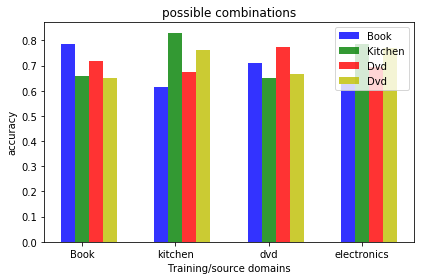

In [233]:
#creating a bar chart

#data to plot
n_groups = 4
means_book = [0.7850, 0.6150, 0.7100, 0.6275]
means_kitchen = [0.6600, 0.8300, 0.6525, 0.7850]
means_dvd = [0.7175, 0.6750, 0.7750, 0.6925]
means_electronics = [0.6525, 0.7625, 0.6650, 0.7700]

#create plot 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity= 0.8

rects1 = plt.bar(index, means_book, bar_width,
                alpha=opacity,
                color='b',
                label='Book')

rects2 = plt.bar(index + bar_width, means_kitchen, bar_width,
                alpha=opacity,
                color='g',
                label='Kitchen')

rects3 = plt.bar(index + bar_width*2, means_dvd, bar_width,
                alpha=opacity,
                color='r',
                label='Dvd')

rects3 = plt.bar(index + bar_width*3, means_electronics, bar_width,
                alpha=opacity,
                color='y',
                label='Dvd')

plt.xlabel('Training/source domains')
plt.ylabel('accuracy')
plt.title('possible combinations')
plt.xticks(index + bar_width, ('Book', 'kitchen', 'dvd', 'electronics'))
plt.legend()

plt.tight_layout()
plt.show()

the table and graph above show the 16 possible combinations of training and testing from the 4 different domains.
the diagrams consistently suggest that when each domain was trained and tested on itself, it had a higher accuracy.

so for instance when book was trained and tested on book, it had the highest accuracy than when it was trained on book and tested on kitchen, dvd, or electronics.
this shows that the training data is more accurate when tested on its own source domain, as oppose to being tested on another domain.

c) Adapt your code so that you can build and use a training set built from multiple categories.  Now **investigate** how having a mixture of source domains affects the accuracy of the Naive Bayes classifier on the target domain.  Make sure you control for or consider how much any improvements are due to the quantity of the training data. \[9 marks\]

In [186]:
#mutliple training on 1 testing 

#1 training set on its OWN testing set    
def combinations01(category1, r):
    training1, testing1 = get_training_test_data(category1, r)
    classifier = NaiveBayesClassifier.train(training1)
    return accuracy(classifier, testing1)


#2 training sets on 1 other testing document 
def combinations03(category1, category2, category3, r):
    training1, testing1 = get_training_test_data(category1, r)
    training2, testing2 = get_training_test_data(category2, r)
    training3, testing3 = get_training_test_data(category3, r)
    classifier = NaiveBayesClassifier.train(training1 + training2)
    return accuracy(classifier, testing3)

#3 training sets on 1 other testing document
def combinations04(category1, category2, category3, category4, r):
    training1, testing1  = get_training_test_data(category1, r)
    training2, testing2 = get_training_test_data(category2, r)
    training3, testing3 = get_training_test_data(category3, r)
    training4, testing4 = get_training_test_data(category4, r)
    classifier = NaiveBayesClassifier.train(training1 + training2 + training3)
    return accuracy(classifier, testing4)
    

print(combinations01("dvd", 0.8)) 
print(combinations03("book", "kitchen", "dvd", 0.8/2))
print(combinations04("book", "kitchen", "electronics", "dvd", 0.8/3))



SyntaxError: invalid syntax (<ipython-input-186-572d5e82c5ef>, line 33)

above is an example of singular, and multiple training sets tested on the same 'dvd' source domain to see whether the 
results vary when multiple training sets test on one constant test set, which in this case is dvd.

when the dvd was trained using its own dvd documents, the accuracy was higher than that of conjoined training sets.
the pattern shown above, shows that the more training sets are used in combination to train the classifier on a constant testing set,
the less accurate the classifier is in its predictions of classifiying features within that document.

for instance, when the three training sets of book, kithchen, and electronics were tested on dvd, the accuracy showed to 
be lower than that of when two training sets(book and kitchen) were used.

the highest accuracy given was when dvd was trained and tested on itself. 


## Question 3: Document Similarity (25 marks)
The objective of this question is to investigate whether incorporating lexical knowledge from WordNet might improve document similarity methods.  For example, knowing that both *tiger* and *leopard* are hyponyms of *big_cat* should increase the similarity between a document mentioning a *tiger* and a document mentioning a *leopard*.

The code below will generate two document collections, both in bag-of-words format, one from the Medline Corpus and one from the Wall Street Journal corpus.

In this question, there are marks available for the quality of your code and the quality of your explanations.

In [277]:
from sussex_nltk.corpus_readers import MedlineCorpusReader
from sussex_nltk.corpus_readers import WSJCorpusReader
from nltk.stem.wordnet import WordNetLemmatizer

def normalise(tokenlist):
    tokenlist=[token.lower() for token in tokenlist]
    tokenlist=["NUM" if token.isdigit() else token for token in tokenlist]
    tokenlist=["Nth" if (token.endswith(("nd","st","th")) and token[:-2].isdigit()) else token for token in tokenlist]
    tokenlist=["NUM" if re.search("^[+-]?[0-9]+\.[0-9]",token) else token for token in tokenlist]
    return tokenlist

def filter_stopwords(tokenlist):
    stop = stopwords.words('english')
    return [w for w in tokenlist if w.isalpha() and w not in stop]

def stem(tokenlist):
    st=WordNetLemmatizer()
    return [st.lemmatize(token) for token in tokenlist]

   
def make_bow(somestring):
    rep=word_tokenize(somestring)  #step 1
    rep=normalise(rep)   #step 2
    rep=stem(rep)   #step 3
    rep=filter_stopwords(rep)  #step 4
    dict_rep={}
    for token in rep:
        dict_rep[token]=dict_rep.get(token,0)+1  #step 5
    return(dict_rep)

wsj=WSJCorpusReader()
medline=MedlineCorpusReader()

collectionsize=50
collections={"wsj":[],"medline":[]}

for key in collections.keys():
    if key=="wsj":
        generator=wsj.raw()
    else:
        generator=medline.raw()
    while len(collections[key])<collectionsize:
        collections[key].append(next(generator))

bow_collections={key:[make_bow(doc) for doc in collection] for key,collection in collections.items()}

In [ ]:
make_bow("the 2nd GROUP of girls who came in at 4 and 0.32 seconds!!?")

a). For each step in the `make_bow()` function, **explain** what it does and why it is applicable when creating document representations for document similarity methods. \[8 marks\]

The make_bow method takes in a parameter of any string. 
#step 1
A varible 'rep' is initialized in the first step of the method. the string (the argument the method takes in)
will be tokenized and stored in the varible 'rep'

#step 2
the value of the variable 'rep' is updated to call the method 'normalise', which normalises the tokenList in the string. 
when normalise is called, it will take the value of 'rep' as its argument, in the make_bow() function,the value that will be returned from this method will
    be stored in 'rep'

    #normalise
    the method normalise, takes in a parameter of tokenList,
    #step 1
    the first step of the method, creates a for loop, which iterates for every token in that tokenList(that was the parameter of the method)
    each token in that tokenlist will be converted into lowercase letters and is stored into the tokenlist, which is 
returned into the variable 'rep'.
    this is applicable when creating document simalarity since it is easier to detect simarlity when all tokenized words are stored in the same form,
    given that form does not change the meaning of the token.
    there is no difference in sentiment between an upper and lowercase word, example: "GROUP" and "group", 
    it would not make a string more or less similar than another string containing the same word in lowercase, so all are kept in the same format.   
        
    #step2
    the second step of the normalise function, checks for whole number integers in the inputted string, using the isDigit() method in an if and else statement.
    if the string does contain an integer, this integer becomes of type NUM, and is stored into the tokenlist, which is returned to the variable 'rep'.
    
    #step3
    the third step of the normalise function uses an if and else statement to check if a token in the tokenlist
    ends with the following characters: 'nd', 'st', 'th', and if the if the token which ends in either of those characters is 
        a digit. if both of these statements are true, that token is categorized of type 'Nth'. 
        an example of this would be, a string,(which is converted to a tokenlist) similar to the following:
        "the 2nd GROUP of girls who came in at 4"
        2nd will become of type Nth.
        
    #step4 
    the final step of the normalise method checks for numbers that are not whole numbers, for instance decimals, negative numbers. 
    if a decimal/negative number etc. is found, it becomes of type NUM as well.
    this has been written on its own line, since the isdigit() method used in step2 only checks for integers(whole numbers)
    this is relevant in document simiarity, because if given multiple documents, an existence of numbers in general gives two documents 
    a similarity, however, whether the number is signed, decimal or a fraction is trivial, and does not make a difference in indentifying simalrity,
    therefore all types of numbers are grouped under the same type, NUM.


#step3
the origin, or singular form of a token in the tokenlist is stored in the variable rep.
for instance, if the tokenized string was "girls", it would be stored as "girl". this makes it easier to indentify simalrity,
because it is more likely to detect two words if they are both stored in the same singular form
as oppose to having one in its plural form and not the other.

#step4
stop words, like (if, the, and, so, a) are eliminated from the tokenlist. this is because they do not contribute to a specific sentiment or meaning.
two documents can share a lot of the same connectives, or stop words and have nothig in common.
for instance:
    string_1: "the cat and the boy took a walk"
    string_2: "the science article shows how a cigerattes a day can lead to cancer"
both strings share the stopwords 'the','and','a','to', however they do not share the same meaning or sentiment.

#STEP5
an empty set 'dict_rep' is initilaised, and for every token stored in the variable rep,
the pointer increment by one, on the position it is pointing towards, adding all the filtered tokens
into the dict_rep set.

If the method make_bow() is called on the following string:
"the 2nd GROUP of girls who came in at 4 and 0.32 seconds!!?"

each word in that string will be tokenized, and stored into the variable 'rep',
the method turn all characters to lowercase, so "GROUP", will become "group".
2nd, will become of type Nth
4 and 0.32 will both become of type NUM
'girls' will be stored as girl 
'the', 'of', 'in', 'at', 'and' will be filtered out since they are stopwords 
and the remaining tokens will be added to the set dict_rep{}

the following is the output after running the string above:

{'Nth': 1, 'group': 1, 'girl': 1, 'came': 1, 'NUM': 2, 'second': 1}



b). Apply a TF-IDF weighting to the representations and then compute: 
* the average cosine similarity of medline documents to each other, 
* the average cosine similarity of WSJ documents to each other,
* the average cosine similarity of medline documents to WSJ documents
\[8 marks\]

In [297]:
import math   
def dot(docA,docB):
    the_sum= 0
    for (key,value) in docA.items():
        the_sum+=value*docB.get(key,0)
    return the_sum
        
        
def cos_sim(docA,docB):
    sim=dot(docA,docB)/(math.sqrt(dot(docA,docA)*dot(docB,docB)))
    return sim

def doc_freq(doclist):
    df={}
    for sentence in doclist:
        for feat in sentence.keys():
            df[feat]=df.get(feat,0)+1
    return df


            
#term-frequency tf - the number of occurences of term t in document d
#docuement frequency df- number of documents in collection containing term t
#inverse document frequency -> idf = log(N/df) - where 
#where N is the total no. of documents
#term frequency-inverse document frequency - tf - idf = tf * idf

def idf(doclist):
    N=len(doclist)
    return {feat:math.log(N/v) for feat, v in doc_freq(doclist).items()}


def tf_idf(doclist,idf):
    documentFreq = doc_freq(doclist) 
    tfidf=[]
    for doc in doclist:
        new_doc={}
        for feat in doc:
            new_doc[feat]=idf[feat]*documentFreq[feat]
        tfidf.append(new_doc)
    return tfidf


def avg_sim(collection_1,collection_2):
    count_cos_sim = 0
    for doc_1 in collection_1:
        for doc_2 in collection_2:
            count_cos_sim += cos_sim(doc_1,doc_2)
            #count_cos_sim = count_cos_sim + x
    return count_cos_sim/2500

    


In [288]:
print(doc_freq(bow_collections["medline"]))

{'NUM': 37, 'early': 3, 'case': 3, 'organ': 1, 'transplantation': 1, 'section': 1, 'healthy': 1, 'ovary': 1, 'fertile': 1, 'woman': 1, 'unintentionally': 1, 'unknowingly': 1, 'subjected': 1, 'oophorectomy': 1, 'described': 4, 'paper': 1, 'concentrate': 1, 'surgical': 1, 'technique': 2, 'outcome': 1, 'preliminary': 2, 'time': 11, 'publication': 1, 'surgeon': 1, 'involved': 4, 'found': 11, 'donor': 1, 'willing': 1, 'lose': 1, 'portion': 2, 'ovarian': 1, 'tissue': 2, 'various': 4, 'reason': 1, 'proven': 1, 'recipient': 1, 'wa': 22, 'made': 4, 'ready': 1, 'concurrently': 1, 'storage': 1, 'necessary': 1, 'material': 3, 'stored': 1, 'saline': 1, 'period': 2, 'upon': 6, 'reintroduction': 1, 'pelvic': 1, 'cavity': 2, 'immediately': 1, 'became': 1, 'reinfused': 1, 'appeared': 2, 'neither': 4, 'begun': 1, 'menstruating': 1, 'postsurgery': 1, 'article': 1, 'month': 2, 'postoperatively': 1, 'sign': 1, 'hopeful': 1, 'spelled': 1, 'manner': 1, 'three': 10, 'group': 13, 'male': 1, 'subject': 1, 'aver

In [295]:
medline = tf_idf(bow_collections["medline"],idf(bow_collections["medline"]))
wsj = tf_idf(bow_collections["wsj"], idf(bow_collections["wsj"]))

In [299]:
#print(avg_sim(tf_idf(bow_collections["medline"],idf(bow_collections["wsj"]))))
#print(avg_sim(tf_idf(bow_collections["wsj"], idf(bow_collections["wsj"]))))
#print(avg_sim(tf_idf(bow_collections["medline"], idf(bow_collections["medline"]))))

print(avg_sim(medline,medline))
print(avg_sim(wsj,wsj))
print(avg_sim(medline,wsj))

0.1684416024776631
0.14802615755488274
0.03812192439111871


c). Expand the document representations by adding **synonyms** and **hypernyms** for each **noun** in the document.  For example, 2 occurrences of the word *tiger* should add 2 occurrences of each of the following **lemma_names** found in the WordNet hypernym hierarchy above *tiger*:
* \['tiger', 'Panthera_tigris'\]
* \['big_cat', 'cat'\]
* \['feline', 'felid'\]
* \['carnivore'\]
* \['placental', 'placental_mammal', 'eutherian', 'eutherian_mammal'\]
* \['mammal', 'mammalian'\]
* \['vertebrate', 'craniate'\]
* \['chordate'\]
* \['animal', 'animate_being', 'beast', 'brute', 'creature', 'fauna'\]
* \['organism', 'being'\]
* \['living_thing', 'animate_thing'\]
* \['whole', 'unit'\]
* \['object', 'physical_object'\]
* \['physical_entity'\]
* \['entity'\]

Recompute the similarities calculated in part b).  Discuss your results. \[9 marks\]

## Question 4: Supervised Methods for WSD (25 marks)
The objective of this question is to build and evaluate a word sense disambiguation (WSD) system for words with multiple senses.  

a).  For each word occurring in the medline corpus (defined above), **write code** to find how many senses it has according to WordNet.  Print a list of the 10 most frequently occurring words with 2 senses (in this corpus). \[4 marks\]

In [2]:
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic as wn_ic
from collections import Counter

#convert medline to sentence
#convert sentences into tokens 
#initilize empty list
#add all sentences to that list
#for every word in the word list, check if the word has two sentces wn.synsets(word)
#if it has two, add to the empty list
#get most common word(method is there)

raw_sentences = bow_collections['medline']
sense_list=[]

for sentence in raw_sentences: 
    for word in sentence:
        if len(wn.synsets(word)) == 2:
            sense_list.append(word)
counter = Counter(sense_list)
most_occur = counter.most_common(10)
print(most_occur)
            
#print(bow_collections["medline"])   

NameError: name 'bow_collections' is not defined

b). A *supervised* WSD algorithm derives model(s) from *sense-annotated corpus data* in order to predict senses of ambiguous words in un-annotated data.  Using the entire document as context, **implement** a supervised word sense disambiguation algorithm to determine the most likely sense of each occurrence of the 3 most frequently occuring words identified in part a). \[8 marks\]

In [ ]:
import operator 

def max_sim(word, contextlemmas,pos=wn.NOUN):
    synsets=wn.synsets(word,pos)
    scores=[]
    for synset in synsets:
        total=0
        for lemma in contextlemmas:
            sofar=0
        for synsetB in wn.synsets(lemma,pos):
            sim=wn.path_similarity(synset,synsetB)
            if sim>sofar:
                sofar=sim
            total+=sofar
        scores.append((synset.definition(),total))
    sortedscores=sorted(scores,key=operator.itemgetter(1), reverse=True)
    #print(sortedscores)
    return sortedscores[0]

#we have: list of documents (medline corpus)
#we want: list of strings (documents in medline corpus as string)
#initialize a new list, which is where the string of document will go
def makestring(corpus, pos):
    docs_as_strings = []
    for document in corpus:
        docs_as_strings.append(' '.join(document))
        #docs_as_strings[raw_sentences]
    return docs_as_strings

#takes the word in the corpus, takes its feature(noun,verb, etc) 
#takes makes string method and applies to corpus
#loop through the corpus , for every sentence: if a word x is in the sentence
#if the word is in the sentence-->
# make a new list, and append the word to the list
#we want to store the sense of the word in th lsit so we call max_sim
#

def sense(word, corpus, pos):
    x = makestring(corpus, pos)
    senses_list = []
    for sentence in x:
         if word in sentence:
            senses_list.append(max_sim(word, sentence, pos))
    return senses_list
sense("temperature", raw_sentences, wn.NOUN)          

c). Evaluate the performance of your WSD system.  How accurate is it for each of the 3 words? **Comment** on the strengths and weaknesses of your WSD system.\[8 marks\] 

#word sense disambiguation 
in this corpus, the 10 most freuquent words are:
    [('membrane', 10), ('temperature', 7), ('molecular', 7), 
     ('uptake', 6), ('data', 6), ('molecule', 6), ('may', 5), 
     ('amino', 5), ('phenomenon', 5), ('ratio', 4)]

The most frequent word in this corpus is membrane, 
the top 10 most frequent words in this corpus all carry a predominant sense. 
There are two senses to the word membrane, the biological definition 
" microscopic double layer of lipids and proteins forming the boundary of cells or organelles.",
and a more generic, definition that is not necesarrily medical.
the WSD above shows that the sense of the word membrane in this corpus would be defined as 
"a thin pliable sheet of material".
this proves that the our WSD is weak and not accurate, since it gave a sense to word membrane that is not bioological or medical,
regardless of the large distribution of word senses skewed towards the bioloical domain.

the second most frequent word is 'temperature':
which has a predominant sense, since most workds have a highly skewed sense distribution. however, regardless of the predominant meaning of the 
word temperature which is: "the degree or intensity of heat present in a substance or object, especially as expressed according to a comparative 
scale and shown by a thermometer or perceived by touch."
the WSD was accurate predicting the sense of this word as :"'the degree of hotness or coldness of a body or environment", which is the less dominant,
but more medical. 

uptake, has two senses:
the more medical sense would be "the taking in or absorption of a substance by a living organism or bodily organ."
however the WSD was weak in its accuracy and chose the word sense that is more generic and non-medical:
"a process of taking up or using up or consuming"


Data: has two word senses, one being a more predominant sense towards scientific industry and the other is part of a
    philosophical domain:
the WSD was accurate in choosing the sense that was scientific, and hence more medical, relative to the philosophical sense.
"a collection of facts from which conclusions may be drawn"

molecule: two word senses
the WSD was accurate in picking the correct scientific sense of the word
'(physics and chemistry) the simplest structural unit of an element or compound'


may: a predominant sense, 
meaning: expressing possibility.
less dominant, but possibly medical sense: "expressing possibility."
the WSD was inaccurate and chose the sense which is non-medical
"the month following April and preceding June'"

amino: a mesynemous word, meaning it has only one meaning.
WSD was accurate:
'the radical -NH2

phenomenon: WSD inaccurate,
    two word senses, and the WSD chose philosophical as oppose to medical term.
  "any state or process known through the senses rather than by intuition or reasoning'"  
correct sense: "a fact or situation that is observed to exist or happen, especially one whose cause or explanation is in question."
    
    
ratio: WSD accurate:
mesynemous word, singular meaning that is medical:
""the relative magnitudes of two quantities
    
    
calculating accuracy of WSD based on the word senses chosen:
 accuracy = accurate senses/total number of frequent senses
 accuracy = 4/9 

 
    

d) How could you extend or improve your WSD system?  You are **not** expected to code any of these extensions or improvements, but your answer should give sufficient details to make it clear how they might be carried out in practice. \[5 marks\]

-the WSD system could improve by grouping phrases together, as bigrams, trigrams, etc.
-this could be done by checking the frequency of occurence of certain phrases togethers, (more than is usualy by chance)
-thesephrases will tell us a lot about the sense of the document. this will increase accuracy, since 
co-occurence of words together might tell us more about the sense of the document.
-however this might be an issue when it comes to weighing the n-grams, because phrases would weig more than uni-grams(words that appear individually).
-an approach to fix this problem will be using the tf-idf SCORE

-the WSD could also be improved by performing disambiguation by comparing overlap between dictionary definitions,
-the WSD could be further improved by using the simplified lesk method, which looks
at the overlap between the definitions of the senses of the ambigious word and the word we re considering.
-the WSD could improve by using the naive bayes classifier instead, where the classifier can decide which class or 'sense'
the word belongs to.

Use the code below to verify that the length of your submission does not exceed 3000 words.

In [6]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 1202

import io
from nbformat import current

filepath="a1.ipynb"
question_count=1202

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 3962
